![header_img](https://drscotthawley.github.io/images/FG-images/header_image.jpg)<p style="text-align: right">*Image credit: NASA*</p>

###### Preface: I'm writing this for myself, current students & [ASPIRE](http://aspirecoop.github.io) collaborators, and to 'give back' to the internet community.   I recently had insight into my 'main' research problem, but started to hit a snag so decided to return to  foundations.  Going back to basics can be a good way to move forward...

By the end of this session, we will -- as an example problem -- have used the 1-dimensional path of an object in the presesece of gravity, to  'train' a system to correctly infer (i.e. to 'learn') the constants of the motion -- initial position and velocity, and the acceleration due to gravity.  Hopefully we learn a few other things along the way. ;-)  

*In the next installment, "Part Ib," we'll derive the differential equation of motion, and in then in "Part II" we'll adapt the techniques we've learned here to do signal processing.*


## Optimization Basics: Gradient Descent

Let's put the "sample problem" aside for now, and talk about the general problem of optimization.   Often we may wish to minimize some function $f(x)$.  In science, doing so may enable us to fit a curve to our data, as we'll do below.   Similarly,'machine learning' systems often operate on the basis of minimizing a 'cost' function to discern patterns in complex datasets.  


Thus we want to find the value of $x$ for which $f(x)$ is the smallest.  A graph of such a function might look like this...

*(Python code follows, to make the graph)*

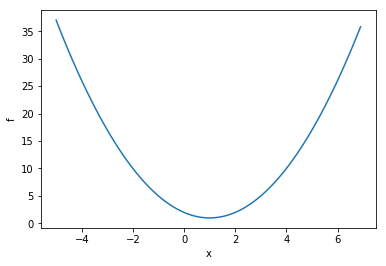

In [ ]:
import numpy as np, matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
x = np.arange(-5,7,0.1)
ax.plot(x,(x-1)**2+1)
plt.show()

If $f(x)$ is differentiable and the derivative (*i.e.*, slope) $df/dx$ can be evaluated easily, then we can perform a so-called "gradient descent".  

We do so as follows:

1. Start with some initial guess for $x$
2. "Go in the direction of  $-df/dx$":
$$x_{new} = x_{old} - \alpha {df\over dx},$$
where $\alpha$ is some parameter often called the "learning rate".  All this equation is saying is, "If the function is increasing, then move to the left; and if the function is decreasing then move to the right."  The actual change to $x$ is given by $\Delta x \equiv - \alpha (df/dx)$.    
3. Repeat step 2 until some approximation criterion is met.

A nice feature of this method is that as $df/dx \rightarrow 0$, so too $\Delta x\rightarrow0$.  So an "adaptive stepsize" is built-in.

Now let's try this out with some Python code...

alpha =  0.002
              final x =  -3.910414704056598
alpha =  0.1
              final x =  0.9999143651384377
alpha =  0.25
              final x =  0.9999999999999947
alpha =  0.8
              final x =  0.999999999951503


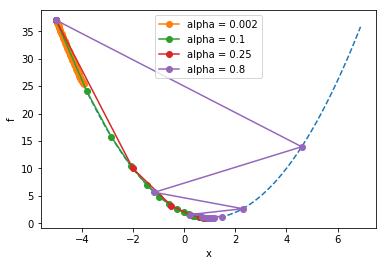

In [ ]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x):
    return (x-1)**2+1

def dfdx(x):
    return 2*(x-1)

fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
x = np.arange(-5,7,0.1)
ax.plot(x,f(x),ls='dashed')

for alpha in ([0.002,0.1,0.25,0.8]):
    print("alpha = ",alpha)
    x = -5                           # starting point
    x_arr = [x]
    y_arr = [f(x)]
    maxiter = 50
    for iter in range(maxiter):	     # do the descent
        # these two lines are just for plotting later
        x_arr.append(x)
        y_arr.append( f(x) )

        # Here's the important part: update via gradient descent
        x = x - alpha * dfdx(x)

    # report and make the plot
    print("              final x = ",x)
    ax.plot(x_arr,y_arr,'o-',label="alpha = "+str(alpha))


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

Notice how the larger learning rate ($\alpha$=0.8) meant that the steps taken were so large that they "overshot" the minimum, whereas the too-small learning rate ($\alpha=0.002$) still hadn't come anywhere close to the minimum before the maximum iteration was reached.

**Exercise:** Experiment by editing the above code: Try different learning rates and observe the behavior.

### Challenge: Instability

You may have noticed, if you made the learning rate too large, that the algorithm does *not* converge to the solution but instead 'blows up'.   This is the 'flip side' of the 'adaptive step size' feature of this algorithm:  If you jump "across" the minimum to the other side and end up a greater distance from the minimum that where you started, you will encounter an even larger gradient, which will lead to an even larger $\Delta x$, and so on.

We can see this with the same code from before, let's just use a different starting point and a step size that's clearly too large...



alpha =  1.1
              final x =  -16.83220089651204


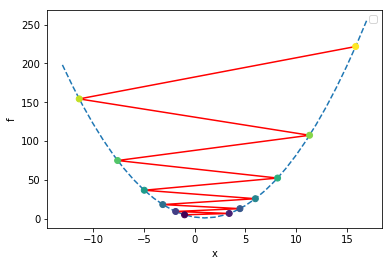

In [ ]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x):
    return (x-1)**2+1

def dfdx(x):
    return 2*(x-1)

alpha = 1.1                     # "too big" learning rate

print("alpha = ",alpha)
x = -1                           # starting point
x_arr = []
y_arr = []
maxiter = 12
for iter in range(maxiter):	     # do the descent
    x_arr.append(x)
    y_arr.append( f(x) )
    x = x - alpha * dfdx(x)

# report and make the plot
print("              final x = ",x)
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
plt.plot(x_arr,y_arr,'r',zorder=2,)
plt.scatter(x_arr,y_arr,zorder=3,c=range(len(x_arr)),cmap=plt.cm.viridis)
xlim = ax.get_xlim()                   # find out axis limits
x = np.arange(xlim[0],xlim[1],1)       # dashed line
plt.plot(x,f(x),zorder=1,ls='dashed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In the above plot, we colored the points by iteration number, starting with the dark purple at the initial location of x=-1, and bouncing around ever-farther from the solution as the color changes to yellow.  As this happens, the error is growing exponentially; this is one example of a numerical instability.  Thus, this algorithm is <a href="http://bit.ly/2kZZVP1">not entirely stable.</a>

![not_entirely_stable](http://hedges.belmont.edu/~shawley/PHY4410/notentirelystable-0.png)

One way to guard against this to check: is our value of $f(x)$ at the current iteration *larger* than the value it was at the previous iteration?  If so, that's a sign that our learning rate is too large, and we can use this criterion to dynamically adjust the learning rate.  

Let's add some 'control' code to that effect, to the previous script, and also print out the values of the relevant variables so we can track the progress:

alpha =  13.0
iter =  0 x =  -1 f(x) = 5 alpha =  13.0
iter =  1 x =  51.0 f(x) = 2501.0 alpha =  13.0
 decreasing alpha. new alpha =  6.5
iter =  2 x =  -599.0 f(x) = 360001.0 alpha =  6.5
 decreasing alpha. new alpha =  3.25
iter =  3 x =  3301.0 f(x) = 10890001.0 alpha =  3.25
 decreasing alpha. new alpha =  1.625
iter =  4 x =  -7424.0 f(x) = 55130626.0 alpha =  1.625
 decreasing alpha. new alpha =  0.8125
iter =  5 x =  4641.625 f(x) = 21535401.390625 alpha =  0.8125
iter =  6 x =  -2899.390625 f(x) = 8412266.77758789 alpha =  0.8125
iter =  7 x =  1813.744140625 f(x) = 3286042.31937027 alpha =  0.8125
iter =  8 x =  -1131.965087890625 f(x) = 1283610.8903790116 alpha =  0.8125
iter =  9 x =  709.1031799316406 f(x) = 501411.1134293014 alpha =  0.8125
iter =  10 x =  -441.5644874572754 f(x) = 195864.32555832085 alpha =  0.8125
iter =  11 x =  277.6028046607971 f(x) = 76510.1115462191 alpha =  0.8125
iter =  12 x =  -171.8767529129982 f(x) = 29887.37169774183 alpha =  0.8125
iter =  

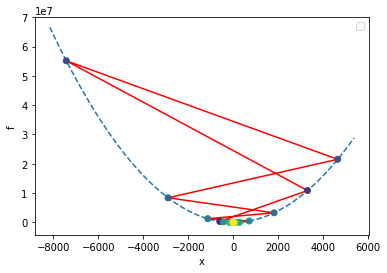

In [ ]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x):
    return (x-1)**2+1

def dfdx(x):
    return 2*(x-1)


alpha = 13.0                     # "too big" learning rate

print("alpha = ",alpha)
x = -1                           # starting point
x_arr = []
y_arr = []
maxiter = 20
f_old = 1e99   # some big number
for iter in range(maxiter):	     # do the descent
    # these two lines are just for plotting later
    x_arr.append(x)

    f_cur = f(x)
    y_arr.append( f_cur )
    
    print("iter = ",iter,"x = ",x,"f(x) =",f(x),"alpha = ",alpha)
    
    if (f_cur > f_old):         # check for runaway behavior
        alpha = alpha * 0.5
        print(" decreasing alpha. new alpha = ",alpha)
    f_old = f_cur
    
    # update via gradient descent
    x = x - alpha * dfdx(x)

# report and make the plot
print("              final x = ",x)
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
plt.plot(x_arr,y_arr,'r',zorder=2,)
plt.scatter(x_arr,y_arr,zorder=3,c=range(len(x_arr)),cmap=plt.cm.viridis)
xlim = ax.get_xlim()
x = np.arange(xlim[0],xlim[1],1)          # x for dashed line
plt.plot(x,f(x),zorder=1,ls='dashed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

So in the preceding example, we start at $x=-1$, then the unstable behavior starts and we begin diverging from the minimum, so we decrease $\alpha$ as often as our criterion tells us to.  Finally $\alpha$ becomes low enought to get the system  'under control' and the algorithm enters the convergent regime.

**Exercise:** In the example above, we only decrease $\alpha$ by a factor of 2 each time, but it would be more efficient to decrease by a factor of 10.  Try that and observe the behavior of the system.

You may say, *"Why do I need to worry about this instability stuff? As long as $\alpha<1$ the system will converge, right?"*  Well, for this simple system it seems obvious what needs to happen, but with multidimensional optimization problems (see below), it's not always obvious what to do. (Sometimes different 'dimensions' need different learning rates.) This simple example serves as an introduction to phenomena which arise in more complex situations.

### Challenge: Non-global minima
To explore more complicated functions, we're going to take advantage of the SymPy package, to let it take derivatives for us.  Try executing the import in the next cell, and if nothing happens it means you have SymPy installed.  If you get an error, you may need to go into a Terminal and run "`pip install sympy`". 

In [ ]:
import sympy

You're good?  No errors?  Ok, moving on...

alpha =  0.002
              final xval =  4.02939564594151
alpha =  0.01
              final xval =  4.02896613891181
alpha =  0.03
              final xval =  -2.00328879556504


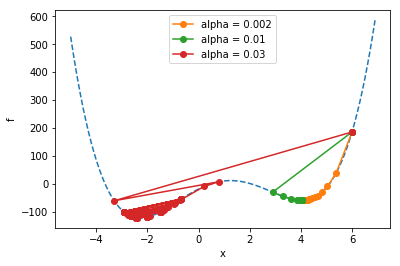

In [ ]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt
from sympy import Symbol, diff

x = Symbol('x')

# our function, more complicated (SymPy handles it!)
f = (x-1)**4 - 20*(x-1)**2 + 10*x + 1
dfdx = diff(f,x)

# setup
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'f'})
x_arr = np.arange(-5,7,0.1)
y_arr = np.copy(x_arr)
for i, val in enumerate(x_arr):
    y_arr[i] = f.evalf(subs={x:val})
ax.plot(x_arr,y_arr,ls='dashed')   # space of 'error function'

# for a variety of learning rates...
for alpha in ([0.002,0.01,0.03]): 
    print("alpha = ",alpha)
    xval = 6                     # starting point
    x_arr = [xval]
    y_arr = [f.evalf(subs={x:xval})]

    maxiter = 50
    # do the descent
    for iter in range(maxiter):

        # these two lines are just for plotting later
        x_arr.append(xval)
        y_arr.append( f.evalf(subs={x:xval}) )

        # update via gradient descent
        xval = xval - alpha * dfdx.evalf(subs={x:xval})
        
    print("              final xval = ",xval)
    ax.plot(x_arr,y_arr,'o-',label="alpha = "+str(alpha))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

All the runs start at $x=6$.  Notice how the runs marked in organge and green go on to find a "local" minimum, but they don't find the "global" minimum (the overall lowest point) like the run marked in red does.  The problem of ending up at non-global local minima is a generic problem for all kinds of optimization tasks.  It tends to get even worse when you add more parameters...

### Multidimensional Gradient Descent  
*(A descent into darkness...)*

Let's define a function of two variables, that's got at least one minimum in it.  We'll choose
$$f(x,y) = -\left( \cos x + 3\cos y \right) /2,$$
which actually has infinitely many minima, but we'll try to 'zoom in' on just one.

We can vizualize this function via the graph produced by the code below; in the graph, darker areas show lower values than ligher areas, and there is a minimum at the point $x=0,y=0$ where $f(0,0)=-2$.

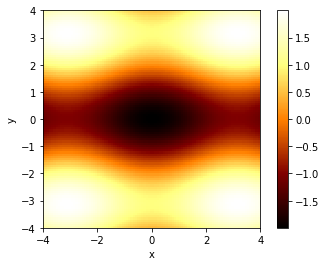

In [ ]:
import numpy as np, matplotlib.pyplot as plt
def f(x,y):
    return -( np.cos(x) + 3*np.cos(y) )/2
x = y = np.linspace(-4, 4, 100)
z = np.zeros([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[j, i] = f(x[i], y[j])
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'y'})
cs = ax.pcolor(x, y, z, cmap=plt.cm.afmhot)
plt.gca().set_aspect('equal', adjustable='box')
cbar = fig.colorbar(cs, orientation='vertical')
plt.show()

The way we find a minimum is similar to what we did before, except we use partial derivatives in the x- and y-directions:

$$x_{new} = x_{old} + \Delta x,\ \ \ \ \ \ \Delta x = - \alpha {\partial f\over \partial x}  $$
$$y_{new} = y_{old} + \Delta y,\ \ \ \ \ \ \Delta y = - \alpha {\partial f\over \partial y},$$

Final xval, yval =  0.0272555602238 3.59400699273e-12 .  Target is (0,0)


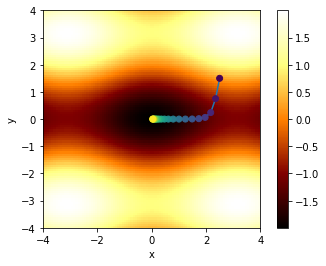

In [ ]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

# our function
def f(x,y):
    return -( np.cos(x) + 3*np.cos(y) )/2
def dfdx(x,y):
    return np.sin(x)/2
def dfdy(x,y):
    return 3*np.sin(y)/2

# variables for this run
alpha = 0.5 
xval, yval = 2.5, 1.5       # starting guess(es)
x_arr = []
y_arr = []

maxiter = 20
for iter in range(maxiter):  # gradient descent loop
    x_arr.append(xval)
    y_arr.append(yval)

    xval = xval - alpha * dfdx(xval,yval)
    yval = yval - alpha * dfdy(xval,yval)

print("Final xval, yval = ",xval,yval,".  Target is (0,0)")


# background image: plot the color background
x = y = np.linspace(-4, 4, 100)
z = np.zeros([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[j, i] = f(x[i], y[j])
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'y'})
cs = ax.pcolor(x, y, z, cmap=plt.cm.afmhot)
plt.gca().set_aspect('equal', adjustable='box')
cbar = fig.colorbar(cs, orientation='vertical')

# plot the progress of our optimization
plt.plot(x_arr,y_arr,zorder=1)
plt.scatter(x_arr,y_arr,zorder=2,c=range(len(x_arr)),cmap=plt.cm.viridis)
handles, labels = ax.get_legend_handles_labels()
plt.show()

In the above figure, we've shown the 'path' the algorithm takes in $x$-$y$ space, coloring the dots according to iteration number, so that the first points are dark purple, and later points tend to yellow.

Note that due to the asymmetry in the function (between $x$ and $y$), the path descends rapidly in $y$, and then travels along the "valley" in $x$ to reach the minimum.   This "long narrow valley" behavior is common in multidimensional optimization problems: the system may 'solve' one parameter quickly, but require thousands of operations to find the other one.  

Many sophisticated schemes have arisen to handle this challenge, and we won't cover them here.  For now, suffice it to say that, yes, this sort of thing happens.  You may have 'found' highly accurate values for certain parameters, but others are bogging down the process of convergence.

*Next time, we'll cover a common application of optimization: Least Squares Regression...*

## Least Squares Regression


This is such a common thing to do in science and statistics, that everyone should learn how it works.  We'll do it for linear relationships, but it generalizes to nonlinear situations as well.



### How to Fit a Line

Let's say we're trying to fit a line to a bunch of data.  We've been given $n$ data points with coordinates $(x_i,y_i)$ where $i=1..n$.  The problem becomes, given a line $f(x) = mx+b$, find the values of the parameters $m$ and $b$ which minimize the overall "error".

#### add some kinda picture here?

The error can take many forms; one is the squared error $SE$, which is just the sum of the squares of the "distances" between each data point's $y$-value and the "guess" from the line fit $f$ at each value of $x$:

$$ SE = (f(x_1) - y_1)^2 + (f(x_2) - y_2)^2 + ... (f(x_n)-y_n)^2,$$

We can write this concisely as
$$ SE = \sum_{i=1}^n (f(x_i)-y_i)^2.$$

Another popular form is the "mean squared error" $MSE$, which is just $SE/n$:

$$ MSE = {1\over n}\sum_{i=1}^n (f(x_i)-y_i)^2.$$

The MSE has the nice feature that as you add more data points, it tends to hold a more-or-less consistent value (as opposed to the SE which gets bigger as you add more points).  We'll use the MSE in the work that follows.

So expanding out $f(x)$, we see that the MSE is a function of $m$ and $b$, and these are the parameters we'll vary to minimize the MSE:
$$ MSE(m,b) = {1\over n}\sum_{i=1}^n (mx_i+b-y_i)^2.$$

So, following our earlier work on multidimensional optimization, we start with guesses for $m$ and $b$ and then update according to gradient descent:

$$m_{new} = m_{old} + \Delta m,\ \ \ \ \ \ \Delta m = -\alpha{\partial (MSE)\over\partial m} = -\alpha{2\over n}\sum_{i=1}^n (mx_i+b-y_i)(x_i) $$
$$b_{new} = b_{old} + \Delta b,\ \ \ \ \ \ \Delta b =  -\alpha{\partial (MSE)\over\partial b} = -\alpha{2\over n}\sum_{i=1}^n (mx_i+b-y_i)(1).$$

So, to start off, let's get some data...

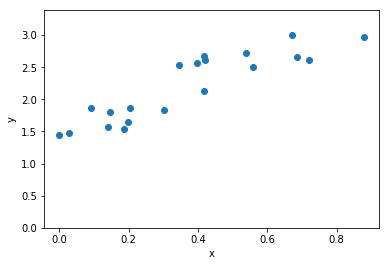

In [ ]:
# Set up the input data
n = 20
np.random.seed(1)               # for reproducability 
x_data = np.random.uniform(size=n)   # random points for x
m_exact = 2.0
b_exact = 1.5
y_data = m_exact * x_data + b_exact
y_data += 0.3*np.random.normal(size=n)   # add noise

# Plot the data
def plot_data(x_data, y_data, axis_labels=('x','y'), zero_y=False):
    fig, ax = plt.subplots()
    ax.update({'xlabel':axis_labels[0], 'ylabel':axis_labels[1]})
    ax.plot(x_data, y_data,'o')
    if (zero_y):
        ax.set_ylim([0,ax.get_ylim()[1]*1.1])
    plt.show()
    
plot_data(x_data,y_data, zero_y=True)

*Note: in contrast to earlier parts of this document which include complete python programs in every code post, for brevity's sake we will start using the notebook "as intended", relying on the internal state and adding successive bits of code which make use of the "memory" of previously-defined variables.*

Let's map out the MSE for this group of points, as a function of possible $m$ and $b$ values...

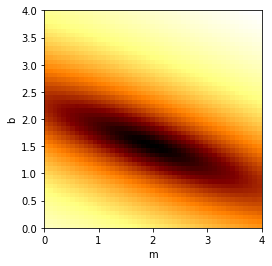

In [ ]:
# map out the MSE for various values of m and b
def MSE(x,y,m,b):
    # Use Python array operations to compute sums
    return ((m*x + b - y)**2).mean()  

mm = bb = np.linspace(0, 4, 50)
z = np.zeros([len(mm), len(bb)])
for i in range(len(mm)):
    for j in range(len(bb)):
        z[j, i] = MSE(x_data,y_data, mm[i],bb[j])
        
fig, ax = plt.subplots()
ax.update({'xlabel':'m', 'ylabel':'b'})
cs = ax.pcolor(mm, bb, np.log(z), cmap=plt.cm.afmhot)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We see the minimum near the "exact" values chosen in the begininng.  (Note that we've plotted the logarithm of the MSE just to make the colors stand out better.)

Next we will choose starting guesses for $m$ and $b$, and use gradient descent to fit the line...

0 : b, m =  3.5 3.5 , MSE =  6.86780331186
4 : b, m =  2.07377614457 2.89890882764 , MSE =  0.98222306593
8 : b, m =  1.55966423863 2.66310750082 , MSE =  0.194874325956
12 : b, m =  1.37811928553 2.56128194633 , MSE =  0.0877947061277
16 : b, m =  1.31767685375 2.50899769214 , MSE =  0.0718728682069
20 : b, m =  1.30118421505 2.47541762467 , MSE =  0.0683627241086
24 : b, m =  1.30049838878 2.44926336309 , MSE =  0.0666665839706
28 : b, m =  1.30535957938 2.4263945595 , MSE =  0.0653286635918
32 : b, m =  1.3120331485 2.40527655618 , MSE =  0.0641346050201
36 : b, m =  1.31916510087 2.38532649645 , MSE =  0.0630441987699
40 : b, m =  1.32626977167 2.36630978168 , MSE =  0.0620438837066
44 : b, m =  1.33317800067 2.34811979986 , MSE =  0.0611251920416
48 : b, m =  1.33983578596 2.33069751134 , MSE =  0.0602811821983
52 : b, m =  1.34623082683 2.31400206963 , MSE =  0.059505695069
56 : b, m =  1.35236573256 2.29800006645 , MSE =  0.0587931380437
60 : b, m =  1.35824825911 2.28266157418 

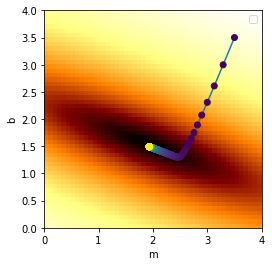

In [ ]:
m = 3.5         # initial guess
b = 3.5 
m_arr = []
b_arr = []

def dMSEdm(x,y,m,b):
    return (2*(m*x + b - y) *x).mean()

def dMSEdb(x,y,m,b):
    return (2*(m*x + b - y)).mean()

alpha = 0.1
maxiter, printevery = 500, 4
for iter in range(maxiter):
    m_arr.append(m)
    b_arr.append(b)
    if (0 == iter % printevery):
        print(iter,": b, m = ",b,m,", MSE = ",MSE(x_data,y_data,m,b))
    
    m = m - alpha * dMSEdm(x_data,y_data,m,b)
    b = b - alpha * dMSEdb(x_data,y_data,m,b)
    
print("Final result: m = ",m,", b = ",b)

# background image: plot the color background (remembered from before)
fig, ax = plt.subplots()
ax.update({'xlabel':'m', 'ylabel':'b'})
cs = ax.pcolor(mm, bb, np.log(z), cmap=plt.cm.afmhot)
plt.gca().set_aspect('equal', adjustable='box')

# plot the progress of our descent
plt.plot(m_arr,b_arr,zorder=1)
plt.scatter(m_arr,b_arr,zorder=2,c=range(len(m_arr)),cmap=plt.cm.viridis)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

*Note that the optimized values $(m,b)$ that we find may not exactly match the "exact" values we used to make the data, because the noise we added to the data can throw this off.  In the limit where the noise amplitude goes to zero, our optimized values will exactly match the "exact" values used to generated the data.*

Let's see the results of our line fit...

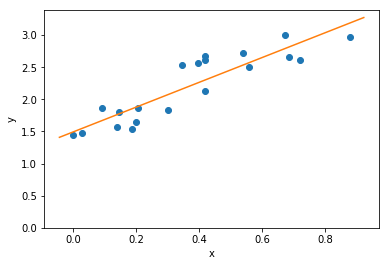

In [ ]:

# plot the points
fig, ax = plt.subplots()
ax.update({'xlabel':'x', 'ylabel':'y'})
ax.plot(x_data,y_data,'o')
ax.set_ylim([0,ax.get_ylim()[1]*1.1])

# and plot the line we fit
xlim = ax.get_xlim()
x_line = np.linspace(xlim[0],xlim[1],2)
y_line = m*x_line + b
ax.plot(x_line,y_line)
plt.show()

Great!

### Least Squares Fitting with Nonlinear Functions

We can generalize the technique describe above to fit polynomials 
$$ f(x) = c_0 + c_1 x + c_2 x^2 + ...c_k x^k,$$
where $c_0...c_k$ are the parameters we will tune, and $k$ is the order of the polynomial. (Typically people use the letter $a$ for polynomial coefficients, but in the math rendering of Jupter, $\alpha$ and $a$ look too much alike, so we'll use $c$.) Written more succinctly,
$$ f(x) = \sum_{j=0}^k c_j x^j.$$

(Indeed, we could even try non-polynomial basis functions, e.g.,
$ f(x) = c_0 + c_1 g(x) + c_2 h(x) + ...,$
but let's stick to polynomials for now.)

The key thing to note is that for each parameter $c_j$, the update $\Delta c_j$ will be

$$\Delta c_j = -\alpha {\partial (MSE)\over \partial c_j} 
= -\alpha {\partial (MSE)\over \partial f}{\partial f\over \partial c_j}$$
$$= -\alpha {2\over n}\sum_{i=1}^n [f(x_i)-y_i](x_i)^{j} $$


*(Note that we are not taking the derivative with respect to $x_i$, but rather with respect to $c_j$.  Thus there is no "power rule" that needs be applied to this derivative.  Also there is no sum over j.)*

The following is a complete code for doing this, along with some added refinements:

* $\alpha$ is now $\alpha_j$, i.e. different learning rates for different directions
* we initialise $\alpha_j$ such that larger powers of $x$ start with smaller coefficients
* we put the fitting code inside a method (with a bunch of parameters) so we can call it later

               Initial guess:    c =  [-3.52 -2.64  4.4   0.44 -1.76  0.44]
     Notice: decreasing alpha[ 3 ] to  0.00729
     Notice: decreasing alpha[ 4 ] to  0.002187
     Notice: decreasing alpha[ 5 ] to  0.0006561
   0/500: MSE =  258.233, c = [-5.438 -1.633  4.24   0.555 -1.904  0.765]
     Notice: decreasing alpha[ 5 ] to  0.00019683
  25/500: MSE = 0.529541, c = [-4.265 -1.545  5.668 -0.392 -2.146  0.612]
  50/500: MSE = 0.424417, c = [-4.304 -1.808  5.659 -0.241 -2.137  0.595]
  75/500: MSE = 0.335586, c = [-4.256 -2.034  5.552 -0.105 -2.115  0.578]
 100/500: MSE = 0.275848, c = [-4.212 -2.218  5.457  0.006 -2.096  0.564]
 125/500: MSE = 0.236521, c = [-4.175 -2.367  5.38   0.096 -2.08   0.553]
 150/500: MSE =  0.21068, c = [-4.146 -2.488  5.317  0.17  -2.068  0.544]
 175/500: MSE = 0.193702, c = [-4.122 -2.586  5.267  0.229 -2.058  0.537]
 200/500: MSE = 0.182549, c = [-4.103 -2.665  5.226  0.277 -2.049  0.531]
 225/500: MSE = 0.175222, c = [-4.087 -2.73   5.192  0.316 -2.04

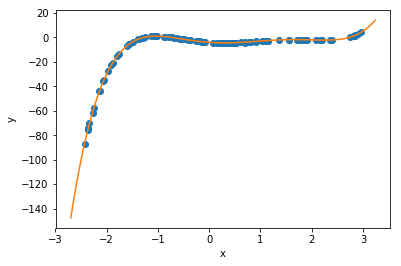

In [ ]:
from __future__ import print_function    # for backwards-compatibility w/ Python2
import numpy as np, matplotlib.pyplot as plt

def f(x,c):
    y = 0*x                    # f will work on single floats or arrays
    for j in range(c.size):
        y += c[j]*(x**j)
    return y

def polyfit(x_data,y_data, c_start=None, order=None, maxiter=500, printevery = 25,
            alpha_start=0.9, alpha_start_power=0.3):
    
    # function definitions

    def MSE(x_arr,y_arr,c):
        f_arr = f(x_arr,c)
        return ((f_arr - y_arr)**2).mean()

    def dMSEdcj(x_arr,y_arr,c,j):  # deriviative of MSE wrt cj (*not* wrt x!)
        f_arr = f(x_arr,c)
        return ( 2* ( f_arr - y_arr) * x_arr**j ).mean()  

    if ((c_start is None) and (order is None)):
        print("Error: Either specify initial guesses for coefficients,",
              "or specify the order of the polynomial")
        raise  # halt
        
    if c_start is not None:
        order = c_start.size-1
        c = np.copy(c_start)
    elif order is not None:
        c = np.random.uniform(size=order+1)     # random guess for starting point

    assert(c.size == order+1)             #  check against conflicting info
    k = order
        
    print("               Initial guess:    c = " ,np.array_str(c, precision=2))
    
    alpha = np.ones(c.size)
    for j in range(c.size):             # start with smaller alphas for higher powers of x
        alpha[j] = alpha_start*(alpha_start_power)**(j)   

    MSE_old = 1e99
    for iter in range(maxiter+1):           # do the descent
        for j in range(c.size): 
            c[j] = c[j] - alpha[j] * dMSEdcj(x_data,y_data,c,j)
            
            MSE_cur = MSE(x_data,y_data,c)
            if (MSE_cur > MSE_old):         # adjust if runaway behavior starts
                alpha[j] *= 0.3
                print("     Notice: decreasing alpha[",j,"] to ",alpha[j])
            MSE_old = MSE_cur

        if (0 == iter % printevery):        # progress log
            print('{:4d}'.format(iter),"/",maxiter,": MSE =",'{:9.6g}'.format(MSE_cur),
                 ", c = ",np.array_str(c, precision=3),sep='')
    print("")
    return c

# Set up input data 
n = 100 
np.random.seed(2)                                 # for reproducability 
x_data = np.random.uniform(-2.5,3,size=n)       # some random points for x
c_data = np.array([-4,-3,5,.5,-2,.5])           # params to generate data (5th-degree polynomial)
y_data = f(x_data, c_data)
y_data += 0.02*np.random.normal(size=n)*y_data    # add a (tiny) bit of noise

#---- Perform Least Squares Fit 
c = polyfit(x_data, y_data, c_start=c_data*np.random.random(), maxiter=500)

#----- Plot the results
def plot_data_and_curve(x_data,y_data,axis_labels=('x','y'), ):
    # plot the points
    fig, ax = plt.subplots()
    ax.update({'xlabel':axis_labels[0], 'ylabel':axis_labels[1]})
    ax.plot(x_data,y_data,'o')

    # and plot the curve we fit
    xlim = ax.get_xlim()
    x_line = np.linspace(xlim[0],xlim[1],100)
    y_line = f(x_line, c)
    ax.plot(x_line,y_line)
    plt.show()

plot_data_and_curve(x_data,y_data)

Now, it turns out that polynomials are often *terrible* things to try to fit arbitrary data with, because they can 'blow up' as $|x|$ increases, and this causes instability.  But for a variety of physics problems (see below), polynomials can be just what we're after.  Plus, that made a nice demonstration, for now. 

(For more general functions, I actually wrote a multi-parameter SymPy gradient-descient that is completely general, but it's *terrifically slow* so I won't be posting it here.  If you really want it, contact me.)

## Learning Gravity

Ok. Now we're all we're going to do next is fit a parabola to the motion of a falling ball -- and that's supposed to tell us something deep about physics. Sounds silly, right?  'Everybody' knows objects moving in a gravitational field follow parabolas (both in space & time); the more math-savvy may complain that we're simply going to 'get out of this' what we 'put into it.'  

Well, from a philosophical standpoint and from the way that these methods will generalize to other situations, there are significant implications from the *methodology* we're about to follow.

**The Challenge**: Given a set of one-dimensional data of position vs. time $y(t)$, can we find the underlying equation that gives rise to it?  Better put, can we fit a model to it, and how well can we fit it, and what kind of model will it be anyway?  

(This is the sort of thing that statisticians *do*, but it's also something physicists do, and one could argue, this is what *everybody* does *all the time*. )

Let's get started.  I'm just going to specify y(t) at a series of $n+1$ time steps $t_i$ ($t_0$...$t_n$) and we'll make them evenly spaced, and we'll leave out any noise at all -- perfect data. :-) 


dt =  0.01 , nt =  100


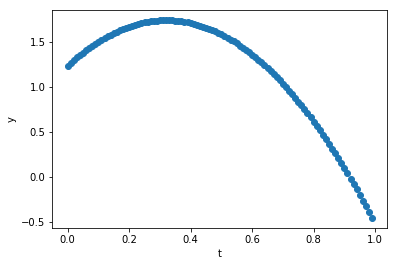

In [ ]:
g_exact = 9.8         # a physical parater we'll find a fit for
dt      = 0.01
tmax    = 1         # number of time steps
t_data  = np.arange(0,tmax,step=dt)     # time values
nt = t_data.size
print("dt = ",dt,", nt = ",nt)

y0      = 1.234         # initial position, choose anything
v0      = 3.1415        # initial velocity

#assign the data
y_data  = y0 + v0*t_data - 0.5 * g_exact * t_data**2  
# y_data *= np.random.uniform(low=.9, high=1.1, size=(y_data.size)) # for later; add noise in

plot_data(t_data,y_data, axis_labels=('t','y'))

Can we fit this with a polynomial?  Sure, let's do that, using the code from before...

               Initial guess:    c =  [ 0.72  0.71  0.77]
   0/1000: MSE =  5.41899, c = [-2.186  7.319 -1.042]
     Notice: decreasing alpha[ 0 ] to  3.0
     Notice: decreasing alpha[ 0 ] to  0.9
 100/1000: MSE =0.0314071, c = [ 1.642  0.749 -2.528]
 200/1000: MSE =0.00280409, c = [ 1.356  2.427 -4.191]
 300/1000: MSE =0.000250355, c = [ 1.27   2.928 -4.688]
 400/1000: MSE =2.23522e-05, c = [ 1.245  3.078 -4.837]
 500/1000: MSE =1.99565e-06, c = [ 1.237  3.122 -4.881]
 600/1000: MSE =1.78176e-07, c = [ 1.235  3.136 -4.894]
 700/1000: MSE =1.59079e-08, c = [ 1.234  3.14  -4.898]
 800/1000: MSE =1.42029e-09, c = [ 1.234  3.141 -4.899]
 900/1000: MSE =1.26806e-10, c = [ 1.234  3.141 -4.9  ]
1000/1000: MSE =1.13215e-11, c = [ 1.234  3.141 -4.9  ]

Our fit:          y(t) = 1.23400775143 + 3.14145457517*t + -4.89995497009*t**2
Compare to exact: y(t) = 1.234 + 3.1415*t - 4.9*t**2
Estimate for g =  9.79990994018


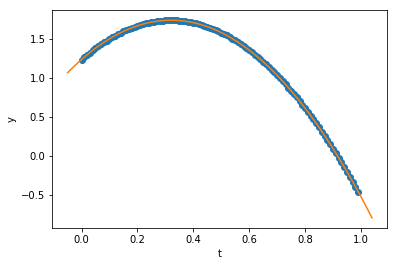

In [ ]:
c = polyfit(t_data, y_data, order=2, alpha_start = 10.0, maxiter=1000, printevery=100)
print("Our fit:          y(t) = ",c[0]," + ",c[1],"*t + ",c[2],"*t**2",sep='')
print("Compare to exact: y(t) = ",y0,  " + ",v0,  "*t - ",0.5*g_exact,"*t**2",sep='')
print("Estimate for g = ",-2*c[2])

plot_data_and_curve(t_data,y_data, axis_labels=('t','y'))

What if we try fitting higher-order terms?  Are their coefficients negligible?  The system *may* converge, but it will take *a lot* more iterations...  (be prepared to wait!)


In [ ]:
c = polyfit(t_data, y_data, order=3, alpha_start = 1.0, maxiter=700000, printevery=10000)
print("Our fit:          y(t) = ",c[0]," + ",c[1],"*t + ",c[2],"*t**2 + ",c[3],"*t**3",sep='')
print("Compare to exact: y(t) = ",y0,  " + ",v0,  "*t - ",0.5*g_exact,"*t**2",sep='')
print("Estimate for g = ",-2*c[2])

               Initial guess:    c =  [ 0.33  0.23  0.63  0.41]
   0/700000: MSE = 0.828106, c = [ 1.189 -0.045  0.563  0.398]
     Notice: decreasing alpha[ 0 ] to  0.3
10000/700000: MSE =0.000464818, c = [ 1.291  2.454 -3.188 -1.138]
20000/700000: MSE =0.000369748, c = [ 1.285  2.528 -3.373 -1.015]
30000/700000: MSE =0.000294122, c = [ 1.279  2.594 -3.538 -0.906]
40000/700000: MSE =0.000233965, c = [ 1.275  2.654 -3.685 -0.808]
50000/700000: MSE =0.000186111, c = [ 1.27   2.706 -3.817 -0.72 ]
60000/700000: MSE =0.000148045, c = [ 1.266  2.753 -3.934 -0.642]
70000/700000: MSE =0.000117765, c = [ 1.263  2.795 -4.038 -0.573]
80000/700000: MSE =9.36783e-05, c = [ 1.26   2.833 -4.131 -0.511]
90000/700000: MSE =7.4518e-05, c = [ 1.257  2.866 -4.214 -0.456]
100000/700000: MSE =5.92766e-05, c = [ 1.254  2.896 -4.289 -0.407]
110000/700000: MSE =4.71526e-05, c = [ 1.252  2.922 -4.355 -0.363]
120000/700000: MSE =3.75083e-05, c = [ 1.25   2.946 -4.414 -0.323]
130000/700000: MSE =2.98366e-05, c =

So, in this case, we were able to *show* not only that the data fits a parabola well, but that the higher order term (for $t^3$) is negigible!!  Great science!    In practice, however, for non-perfect data, this does not work out.  The higher-order term introduces an extreme sensitivity to the noise, which can render the results inconclusive.

**Exercise:** Go back to where the data is generated, and uncomment the line that says "# for later; add noise in" and re-run the fitting.  You will find that the coefficients for the cubic polynomial do *not* resemble the original values found at all, whereas the coefficients for a quadratic polynomial, while not being the same as before, will still be "close."

Thus, by *hypothesizing* a parabolic dependence, we're able to correctly deduce the parameters of the motion (initial position & velocity, and acceleration), and we get a very low error in doing so. :-)  Trying to show that higher-order terms in a polynomial expansion don't contribute...that worked for "perfect data" but in a practical case it didn't work out because polynomials are "ill behaved."   Still, we got some useful physics out of it. And that works for many applications.  We could stop here. 

...although...

*What if our data wasn't parabolic?* Sure, for motion in a uniform gravitational field this is fine, but what if we want to model the sinusoidal motion of a simple harmonic oscillator?  In that case, guessing a parabola would only work for very early times (thanks to [Taylor's theorem](https://en.wikipedia.org/wiki/Taylor's_theorem)).  Sure, we could fit a model where we've explictly put in a sine function in the code -- and I encourage you to write your own code to do this -- but perhaps there's a way to *deduce* the motion, by looking at the local behavior and thereby 'learning' the differential equation underlying the motion.

**Exercise:** Copy the `polyfit()` code elsewhere (e.g. to text file or a new cell in this Jupyter notebook or a new notebook) and rename it `sinefit()`, and modify it to fit a sine function instead of a polynomial:

$$y(t) = A\sin(\omega t + \phi),$$

where the fit parameters will be the amplitude $A$, frequency $\omega$ and phase constant $\phi$.  Try fitting to data generated for $A=3$, $\omega=2$, $\phi=1.57$ on $0\le t \le 10$.
As an example, you can check your answer against [this](http://hedges.belmont.edu/~shawley/PHY4410/sinefit_a3w2p1.57.png). 
<br>
<br>
<div align="center"><i>The discussion goes on, but I'm breaking it off into a "Part Ib" for a separate post.  In that post, we'll switch from fitting the data "globally" to looking "locally," in preparation for work in "Time Series Prediction."
</i></div>

-SH

<hr>
## Afterward: Alternatives to "Simple" Gradient Descent

There are *lots* of schemes that incorporate more sophisticated approaches in order to achieve convergence more reliabily and more quickly than the "simple" gradient descent we've been doing. 

Such schemes introduce concepts such as "momentum" and go by names such as Adagrad, Adadelta, Adam, RMSProp, etc... For an excellent overview of such methods, I recommend [Sebastian Ruder's blog post](http://sebastianruder.com/optimizing-gradient-descent/) which includes some great animations!